In [7]:
!unzip '/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8914e04-4e33-4189-bfa9-f547e5f696d1___GCREC_Bact.Sp 3173.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  

##Importing Libraries

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)


Found 3416 images belonging to 9 classes.


##Adding Layers

In [2]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
len(x_train)

143

In [ ]:
1238/24

51.583333333333336

In [ ]:

model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
143/143 [==============================] - 131s 908ms/step - loss: 2.1251 - accuracy: 0.4432 - val_loss: 0.9709 - val_accuracy: 0.6809
Epoch 2/10
143/143 [==============================] - 130s 907ms/step - loss: 0.8973 - accuracy: 0.6985 - val_loss: 0.8680 - val_accuracy: 0.7125
Epoch 3/10
143/143 [==============================] - 126s 883ms/step - loss: 0.6304 - accuracy: 0.7851 - val_loss: 0.4569 - val_accuracy: 0.8428
Epoch 4/10
143/143 [==============================] - 123s 861ms/step - loss: 0.5369 - accuracy: 0.8147 - val_loss: 0.3411 - val_accuracy: 0.8823
Epoch 5/10
143/143 [==============================] - 123s 860ms/step - loss: 0.4815 - accuracy: 0.8305 - val_loss: 0.4353 - val_accuracy: 0.8419
Epoch 6/10
143/143 [==============================] - 126s 885ms/step - loss: 0.4056 - accuracy: 0.8580 - val_loss: 0.5034 - val_accuracy: 0.8229
Epoch 7/10
143/143 [==============================] - 124s 867ms/step - loss: 0.4036 - accuracy: 0.8604 - val_loss: 0.2579 -

##Test and save the model

In [5]:
model.save('vegetabledata.h5')
model=load_model('vegetabledata.h5')

In [ ]:
img=image.load_img(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG")

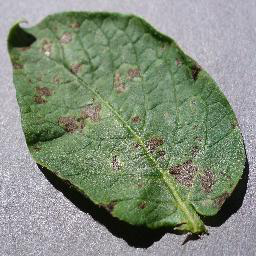

In [8]:
img=image.load_img(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG")
img

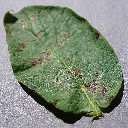

In [ ]:
x=image.img_to_array(img)
img=image.load_img(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG",target_size=(128,128))
img

In [ ]:
x=image.img_to_array(img)
x

array([[[191., 189., 200.],
        [189., 187., 198.],
        [189., 187., 198.],
        ...,
        [178., 176., 190.],
        [183., 181., 195.],
        [174., 172., 186.]],

       [[184., 182., 193.],
        [192., 190., 201.],
        [195., 193., 204.],
        ...,
        [181., 179., 193.],
        [191., 189., 203.],
        [173., 171., 185.]],

       [[184., 182., 193.],
        [192., 190., 201.],
        [197., 195., 206.],
        ...,
        [174., 172., 186.],
        [183., 181., 195.],
        [171., 169., 183.]],

       ...,

       [[163., 161., 172.],
        [176., 174., 185.],
        [159., 157., 168.],
        ...,
        [158., 156., 167.],
        [131., 130., 138.],
        [145., 144., 152.]],

       [[171., 169., 180.],
        [167., 165., 176.],
        [174., 172., 183.],
        ...,
        [137., 135., 146.],
        [134., 133., 141.],
        [185., 184., 192.]],

       [[157., 155., 166.],
        [224., 222., 233.],
        [204., 2

In [ ]:
x=np.expand_dims(x,axis=0)
x

array([[[[191., 189., 200.],
         [189., 187., 198.],
         [189., 187., 198.],
         ...,
         [178., 176., 190.],
         [183., 181., 195.],
         [174., 172., 186.]],

        [[184., 182., 193.],
         [192., 190., 201.],
         [195., 193., 204.],
         ...,
         [181., 179., 193.],
         [191., 189., 203.],
         [173., 171., 185.]],

        [[184., 182., 193.],
         [192., 190., 201.],
         [197., 195., 206.],
         ...,
         [174., 172., 186.],
         [183., 181., 195.],
         [171., 169., 183.]],

        ...,

        [[163., 161., 172.],
         [176., 174., 185.],
         [159., 157., 168.],
         ...,
         [158., 156., 167.],
         [131., 130., 138.],
         [145., 144., 152.]],

        [[171., 169., 180.],
         [167., 165., 176.],
         [174., 172., 183.],
         ...,
         [137., 135., 146.],
         [134., 133., 141.],
         [185., 184., 192.]],

        [[157., 155., 166.],
       

In [ ]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 168ms/step


In [ ]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [ ]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Potato___Early_blight'

In [ ]:
img=image.load_img(r"/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 52ms/step


'Potato___Early_blight'